Вектор: [-1.  0.  1.  2.  3.  4.  5.]
Тип объекта: <class 'tensorflow.python.framework.ops.EagerTensor'>


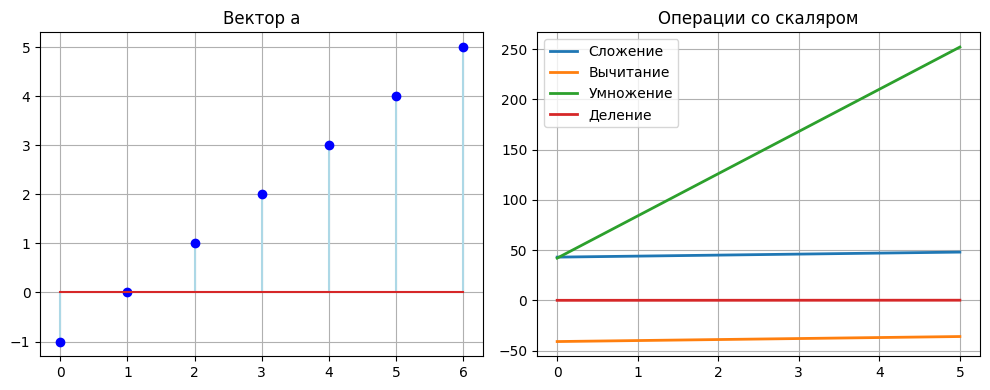

Исходный вектор: [1. 2. 3. 4. 5. 6.]
Отрицательный вектор: [-1. -2. -3. -4. -5. -6.]


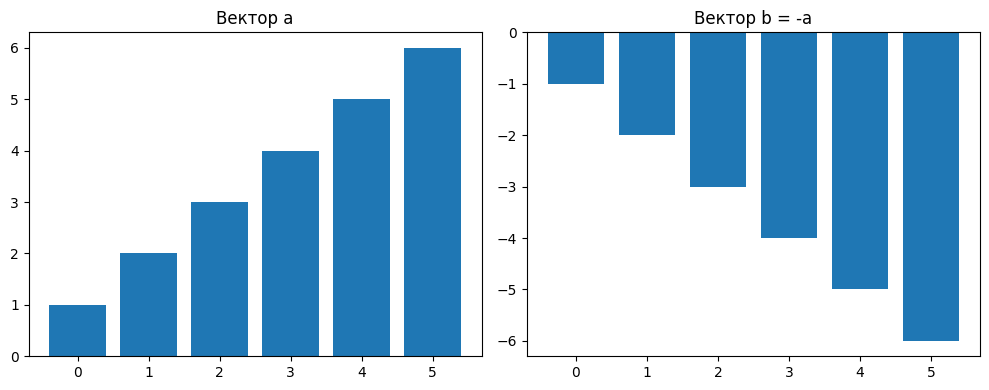

Скалярное произведение: -91.0
Норма вектора: 7.4161983


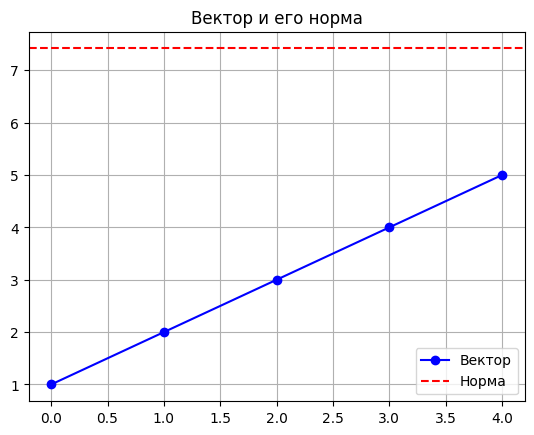

Косинусное сходство между a и b: 0.984732


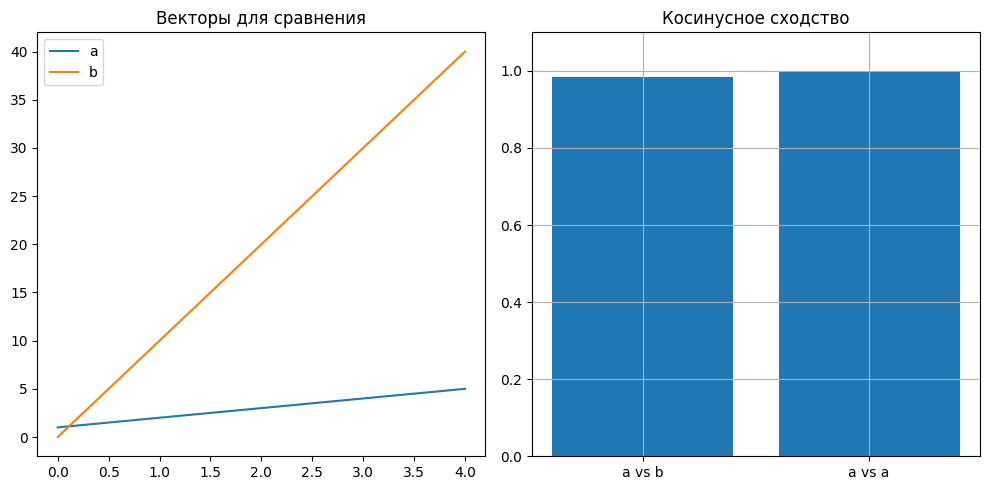

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Создание векторов
a = tf.constant([-1, 0, 1, 2, 3, 4, 5], dtype=tf.float32)
print('Вектор:', a.numpy())
print('Тип объекта:', type(a))

# Визуализация вектора (исправлено)
plt.figure(figsize=(10, 4))
plt.subplot(121)
markerline, stemlines, baseline = plt.stem(a.numpy())
plt.setp(markerline, color='blue', marker='o')  # Настройка маркеров
plt.setp(stemlines, color='lightblue', linewidth=1.5)  # Настройка стеблей
plt.title('Вектор a')
plt.grid(True)

# Операции со скаляром
a = tf.constant([1, 2, 3, 4, 5, 6], dtype=tf.float32)
k = tf.constant(42.0)

# Визуализация операций (без изменений)
operations = [a + k, a - k, a * k, a / k]
titles = ['Сложение', 'Вычитание', 'Умножение', 'Деление']

plt.subplot(122)
for i, op in enumerate(operations):
    plt.plot(op.numpy(), label=titles[i], lw=2)
plt.title('Операции со скаляром')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Создание отрицательного вектора
b = -a
print("Исходный вектор:", a.numpy())
print("Отрицательный вектор:", b.numpy())

# Визуализация векторов
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.bar(range(len(a)), a.numpy())
plt.title('Вектор a')
plt.subplot(122)
plt.bar(range(len(b)), b.numpy())
plt.title('Вектор b = -a')
plt.tight_layout()
plt.show()

# Скалярное произведение
dot_product = tf.tensordot(a, b, axes=1)
print("Скалярное произведение:", dot_product.numpy())

# Норма вектора
x = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
norm = tf.norm(x)
print("Норма вектора:", norm.numpy())

# Визуализация нормы
plt.figure()
plt.plot(x.numpy(), 'bo-', label='Вектор')
plt.axhline(norm.numpy(), color='r', linestyle='--', label='Норма')
plt.title('Вектор и его норма')
plt.legend()
plt.grid(True)
plt.show()

# Косинусное сходство
a = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
b = tf.constant([0, 10, 20, 30, 40], dtype=tf.float32)

cos_sim = tf.tensordot(a, b, axes=1) / (tf.norm(a) * tf.norm(b))
print("Косинусное сходство между a и b:", cos_sim.numpy())

# Визуализация косинусного сходства
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(a.numpy(), label='a')
plt.plot(b.numpy(), label='b')
plt.title('Векторы для сравнения')
plt.legend()

plt.subplot(122)
plt.bar(['a vs b', 'a vs a'], 
        [cos_sim.numpy(), 
         tf.tensordot(a, a, axes=1).numpy() / (tf.norm(a)**2).numpy()])
plt.title('Косинусное сходство')
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

Матрица:
 [[-1.  0.  1.]
 [ 2.  3.  4.]]
Тип объекта: <class 'tensorflow.python.framework.ops.EagerTensor'>
Размер матрицы: (2, 3)


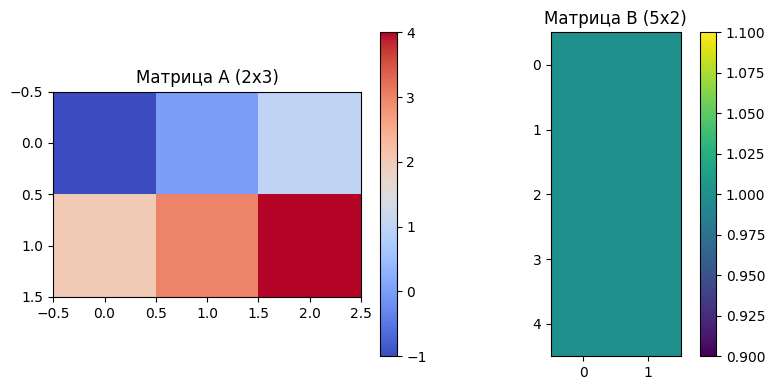

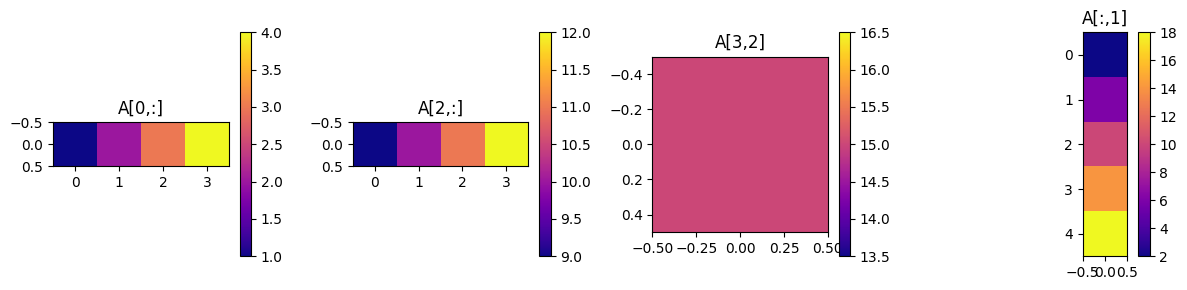

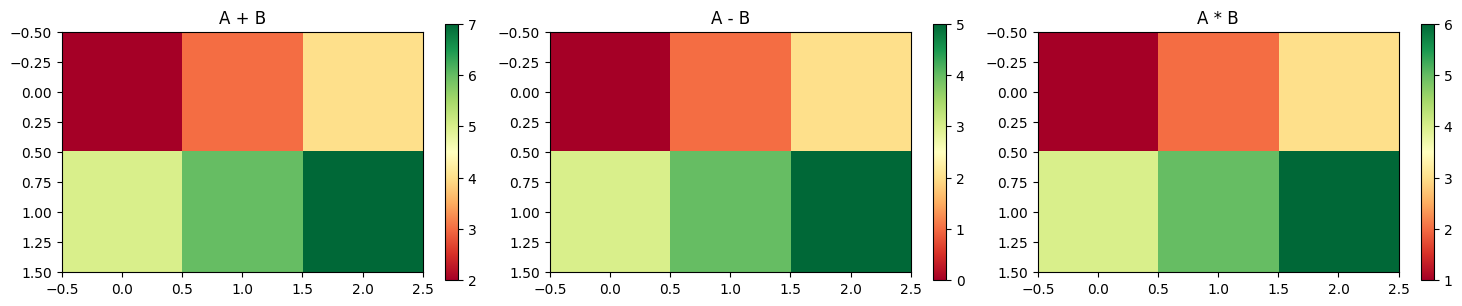

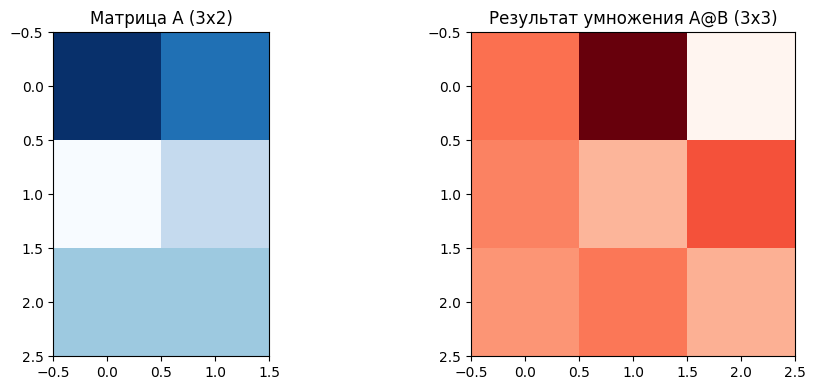

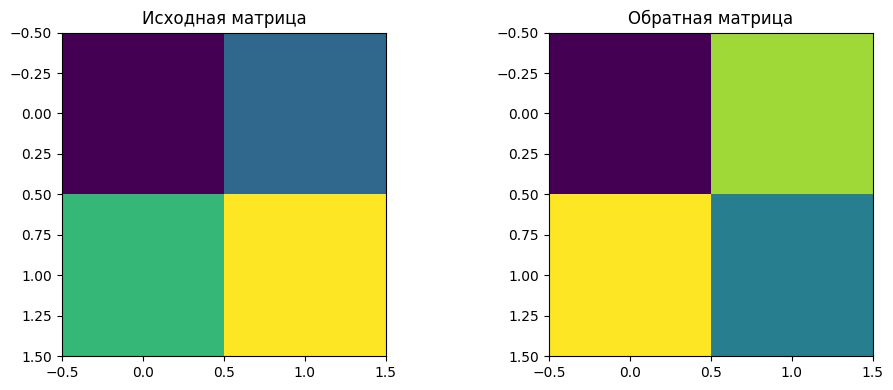

Проверка обратной матрицы:
 [[ 1.0000000e+00  0.0000000e+00]
 [-4.7683716e-07  1.0000002e+00]]


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Создание и визуализация базовых матриц
A = tf.constant([[-1,0,1],[2,3,4]], dtype=tf.float32)
print('Матрица:\n', A.numpy())
print('Тип объекта:', type(A))
print('Размер матрицы:', A.shape)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(A.numpy(), cmap='coolwarm')
plt.title('Матрица A (2x3)')
plt.colorbar()

# 2. Квадратная матрица и матрица из единиц
A_sq = tf.constant([[-1,0,1],[2,3,4],[5,5,5]], dtype=tf.float32)
B = tf.ones((5,2), dtype=tf.float32)

plt.subplot(122)
plt.imshow(B.numpy(), cmap='viridis')
plt.title('Матрица B (5x2)')
plt.colorbar()
plt.tight_layout()
plt.show()

# 3. Большая матрица и операции срезами
A_large = tf.constant([
    [1,2,3,4], 
    [5,6,7,8], 
    [9,10,11,12],
    [13,14,15,16], 
    [17,18,19,20]
], dtype=tf.float32)

# Визуализация срезов
slices = {
    'A[0,:]': A_large[0:1,:],
    'A[2,:]': A_large[2:3,:],
    'A[3,2]': tf.reshape(A_large[3,2], (1,1)),
    'A[:,1]': tf.reshape(A_large[:,1], (-1,1))
}

plt.figure(figsize=(12,3))
for i, (title, slc) in enumerate(slices.items(), 1):
    plt.subplot(1,4,i)
    plt.imshow(slc.numpy(), cmap='plasma')
    plt.title(title)
    plt.colorbar()
plt.tight_layout()
plt.show()

# 4. Матричные операции
A = tf.constant([[1,2,3],[4,5,6]], dtype=tf.float32)
B = tf.ones((2,3), dtype=tf.float32)

# Визуализация операций
operations = {
    'A + B': A + B,
    'A - B': A - B,
    'A * B': A * B
}

plt.figure(figsize=(15,3))
for i, (title, result) in enumerate(operations.items(), 1):
    plt.subplot(1,3,i)
    plt.imshow(result.numpy(), cmap='RdYlGn')
    plt.title(title)
    plt.colorbar()
plt.tight_layout()
plt.show()

# 5. Матричное умножение
A = tf.constant([[3,2], [-1,0], [0.5,0.5]], dtype=tf.float32)
B = tf.constant([[-5,0.5,-10], [11,12,10]], dtype=tf.float32)

# Вычисление произведения
matmul_result = tf.linalg.matmul(A, B)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(A.numpy(), cmap='Blues')
plt.title('Матрица A (3x2)')
plt.subplot(122)
plt.imshow(matmul_result.numpy(), cmap='Reds')
plt.title('Результат умножения A@B (3x3)')
plt.tight_layout()
plt.show()

# 6. Обратная матрица
A = tf.constant([[1,2],[3,4]], dtype=tf.float32)
A_inv = tf.linalg.inv(A)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(A.numpy(), cmap='viridis')
plt.title('Исходная матрица')
plt.subplot(122)
plt.imshow(A_inv.numpy(), cmap='viridis')
plt.title('Обратная матрица')
plt.tight_layout()
plt.show()

# Проверка A @ A_inv
identity_check = A @ A_inv
print("Проверка обратной матрицы:\n", identity_check.numpy())